<a href="https://colab.research.google.com/github/Efi-Pecani/entrepreneurs-during-crisis/blob/main/startup_at_crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Entrpeneurs expressing feelings about their future

Data Analysis and prediction using OpenAI and Sentiment Analysis of 2 periods in time

In [ ]:
!pip install docx2txt nltk

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=9fd1e0ef8abea954de89ad866be3a7f06e924c1af7c2662e9552d3f139194733
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [ ]:
import docx2txt
import nltk
import numpy as np
import re
import pandas as pd

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the Word document
document = docx2txt.process("interviews_n=50.docx")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Split the document into individual responses using '@' sign
responses = re.findall(r'@(\d+)([WM])([\s\S]*?)(?=@\d+[WM]|$)', document)

# Create a DataFrame
df = pd.DataFrame(responses, columns=['id', 'gender', 'text'])

# Clean up the 'text' column
df['text'] = df['text'].apply(lambda x: x.strip())

# Add 'male' column to the original DataFrame
df['male'] = (df['gender'] == 'M').astype(int)

# Display the updated DataFrame
print(df)

    id gender                                               text  male
0    1      W  I'm an Israeli tech entrepreneur and a single ...     0
1    2      W  Starting my own business was a dream that I ha...     0
2    3      W  I'm an Orthodox Jewish woman who founded a sta...     0
3    4      W  I was born in a Kibbutz. I founded a startup i...     0
4    5      W  I'm a 60-year-old woman who's been passionate ...     0
5    6      W  Michal took great pride in the team she had as...     0
6    7      W  When I made the decision to leave my previous ...     0
7    8      W  My name is Maria from Brazil originally and I'...     0
8    9      M  We did not manage the crisis, the crisis manag...     1
9   10      M  I grew up in a small town in Israel, where my ...     1
10  11      M  I hate to admit it, but the army really taught...     1
11  12      M  I don’t think many things have prepared me to ...     1
12  13      M  The key is not in avoiding the difficult momen...     1
13  14

In [ ]:
df.shape

(38, 4)

#Visualizations Exploratory Data Analysis

In [ ]:
df['male'].mean()

0.5

In [ ]:
# Calculate the text length for each entry in the 'text' column
df['text_length'] = df['text'].apply(len)

# Print the summary statistics of text length
print(df['text_length'].describe())

count      38.000000
mean     2255.868421
std      1190.539491
min       489.000000
25%      1461.250000
50%      1995.500000
75%      3004.000000
max      5526.000000
Name: text_length, dtype: float64


In [ ]:
import plotly.express as px

# Create a histogram figure using Plotly
fig = px.histogram(df, x='text_length', nbins=20, title='Distribution of Text Lengths')
fig.update_xaxes(title='Text Length')
fig.update_yaxes(title='Frequency')

# Show the histogram figure
fig.show()


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate the distribution of men and women
gender_distribution = df['gender'].value_counts()

# Create bars for each gender with different colors
bars = []
colors = {'W': 'LightPink', 'M':'MidnightBlue'}

for gender, count in gender_distribution.items():
    bars.append(
        go.Bar(
            x=[gender],
            y=[count],
            name=gender,
            marker_color=colors[gender]
        )
    )

# Create a bar chart using Plotly
fig = go.Figure(data=bars)

# Customize the chart
fig.update_layout(
    title='Gender Distribution in Survey Responses',
    xaxis_title='Gender',
    yaxis_title='Count',
    barmode='group'
)

# Show the chart
pio.show(fig)


In [ ]:
def analyze_text(text):
    # Tokenize the text into words and sentences
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)

    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Count the number of words, sentences, and unique words
    num_words = len(words)
    num_sentences = len(sentences)
    num_unique_words = len(set(words))

    return num_words, num_sentences, num_unique_words

# Analyze the text for each response in the DataFrame
df[['num_words', 'num_sentences', 'num_unique_words']] = df['text'].apply(analyze_text).apply(pd.Series)

# Display the updated DataFrame
df.head(38)

,id,gender,text,male,text_length,num_words,num_sentences,num_unique_words
0,1,W,I'm an Israeli tech entrepreneur and a single ...,0,1944,207,15,143
1,2,W,Starting my own business was a dream that I ha...,0,2316,237,21,134
2,3,W,I'm an Orthodox Jewish woman who founded a sta...,0,2008,224,19,140
3,4,W,I was born in a Kibbutz. I founded a startup i...,0,2200,243,25,153
4,5,W,I'm a 60-year-old woman who's been passionate ...,0,2012,218,17,154
5,6,W,Michal took great pride in the team she had as...,0,1977,203,16,125
6,7,W,When I made the decision to leave my previous ...,0,4980,534,40,312
7,8,W,My name is Maria from Brazil originally and I'...,0,2762,311,31,170
8,9,M,"We did not manage the crisis, the crisis manag...",1,1024,108,12,66
9,10,M,"I grew up in a small town in Israel, where my ...",1,3194,348,37,206


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

def create_scatter_plot(df, column, title):
    fig = go.Figure()
    # Add scatter plots for each gender
    for gender, color in zip(['W', 'M'], ['LightPink', 'MidnightBlue']):
        gender_df = df[df['gender'] == gender]
        fig.add_trace(go.Scatter(x=gender_df['id'], y=gender_df[column],
                                 mode='markers',
                                 marker_color=color,
                                 marker_symbol='circle',
                                 name=gender))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title='Response ID',
                      yaxis_title=column,
                      showlegend=True)

    # Show the plot
    pio.show(fig)

# Create scatter plots for the number of words, sentences, and unique words
create_scatter_plot(df, 'num_words', 'Number of Words per Response')


In [ ]:
create_scatter_plot(df, 'num_sentences', 'Number of Sentences per Response')

In [ ]:
create_scatter_plot(df, 'num_unique_words', 'Number of Unique Words per Response')

**Analysis using SentimentIntensityAnalyzer**

This code defines a function called analyze_sentiment() that takes a text as input and returns the sentiment scores calculated by the SentimentIntensityAnalyzer. It then applies this function to the 'text' column in the DataFrame and adds the resulting sentiment scores as a new 'sentiment' column.

The sentiment scores include positive, negative, neutral, and compound scores. The compound score is a single metric that represents the overall sentiment of the text, with values ranging from -1 (most negative) to 1 (most positive).

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Analyze the sentiment for each response in the DataFrame
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Extract the compound metric from the sentiment scores
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
# Display the updated DataFrame
df.head(10)

,id,gender,text,male,text_length,num_words,num_sentences,num_unique_words,sentiment,compound,neg,neu,pos
0,1,W,I'm an Israeli tech entrepreneur and a single ...,0,1944,207,15,143,"{'neg': 0.064, 'neu': 0.694, 'pos': 0.242, 'co...",0.9964,0.064,0.694,0.242
1,2,W,Starting my own business was a dream that I ha...,0,2316,237,21,134,"{'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'co...",0.9862,0.101,0.726,0.173
2,3,W,I'm an Orthodox Jewish woman who founded a sta...,0,2008,224,19,140,"{'neg': 0.061, 'neu': 0.774, 'pos': 0.165, 'co...",0.9857,0.061,0.774,0.165
3,4,W,I was born in a Kibbutz. I founded a startup i...,0,2200,243,25,153,"{'neg': 0.064, 'neu': 0.762, 'pos': 0.174, 'co...",0.9922,0.064,0.762,0.174
4,5,W,I'm a 60-year-old woman who's been passionate ...,0,2012,218,17,154,"{'neg': 0.099, 'neu': 0.738, 'pos': 0.163, 'co...",0.9616,0.099,0.738,0.163
5,6,W,Michal took great pride in the team she had as...,0,1977,203,16,125,"{'neg': 0.041, 'neu': 0.778, 'pos': 0.181, 'co...",0.9941,0.041,0.778,0.181
6,7,W,When I made the decision to leave my previous ...,0,4980,534,40,312,"{'neg': 0.059, 'neu': 0.69, 'pos': 0.251, 'com...",0.9997,0.059,0.690,0.251
7,8,W,My name is Maria from Brazil originally and I'...,0,2762,311,31,170,"{'neg': 0.102, 'neu': 0.693, 'pos': 0.204, 'co...",0.9969,0.102,0.693,0.204
8,9,M,"We did not manage the crisis, the crisis manag...",1,1024,108,12,66,"{'neg': 0.13, 'neu': 0.641, 'pos': 0.229, 'com...",0.9790,0.130,0.641,0.229
9,10,M,"I grew up in a small town in Israel, where my ...",1,3194,348,37,206,"{'neg': 0.059, 'neu': 0.732, 'pos': 0.209, 'co...",0.9986,0.059,0.732,0.209


In [ ]:
#df.head(20)

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

def create_scatter_plot(df, column, title):
    fig = go.Figure()

    # Add scatter plots for each gender
    for gender, color in zip(['W', 'M'], ['LightPink', 'MidnightBlue']):
        gender_df = df[df['gender'] == gender]
        fig.add_trace(go.Scatter(x=gender_df['id'], y=gender_df[column],
                                 mode='markers',
                                 marker_color=color,
                                 marker_symbol='circle',
                                 name=gender))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title='Response ID',
                      yaxis_title=column,
                      showlegend=True)

    # Show the plot
    pio.show(fig)

# Create scatter plots for the compound, negative, neutral, and positive sentiment scores
create_scatter_plot(df, 'compound', 'Compound Sentiment Scores per Response')
create_scatter_plot(df, 'neg', 'Negative Sentiment Scores per Response')
create_scatter_plot(df, 'neu', 'Neutral Sentiment Scores per Response')
create_scatter_plot(df, 'pos', 'Positive Sentiment Scores per Response')


**Anlyzing using TextBlob**

This code defines a function called analyze_sentiment() that takes a text as input and returns the sentiment scores calculated by TextBlob. It then applies this function to the 'text' column in the DataFrame and adds the resulting sentiment scores as a new 'textblob_sentiment' column.

TextBlob returns a sentiment score as a namedtuple of the form (polarity, subjectivity), where polarity is a float between -1 (most negative) and 1 (most positive), and subjectivity is a float between 0 (most objective) and 1 (most subjective).

You can now compare the sentiment analysis results from TextBlob with those from VADER and decide which method works best for your specific use case. Other sentiment analysis libraries and techniques include machine learning models, deep learning models (e.g., using LSTM or Transformer-based architectures), and rule-based methods. The choice of the method depends on your specific requirements, the type of data you are working with, and the resources available for model training and deployment.

In [ ]:
# pip install textblob

In [ ]:
from textblob import TextBlob

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment

# Analyze the sentiment for each response in the DataFrame
df['textblob_sentiment'] = df['text'].apply(analyze_sentiment)

# Separate the polarity and subjectivity scores into two new columns
df['polarity'] = df['textblob_sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['textblob_sentiment'].apply(lambda x: x.subjectivity)

# Display the updated DataFrame
df.head(3)

,id,gender,text,male,text_length,num_words,num_sentences,num_unique_words,sentiment,compound,neg,neu,pos,textblob_sentiment,polarity,subjectivity
0,1,W,I'm an Israeli tech entrepreneur and a single ...,0,1944,207,15,143,"{'neg': 0.064, 'neu': 0.694, 'pos': 0.242, 'co...",0.9964,0.064,0.694,0.242,"(0.08649481831300013, 0.5057162534435262)",0.086495,0.505716
1,2,W,Starting my own business was a dream that I ha...,0,2316,237,21,134,"{'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'co...",0.9862,0.101,0.726,0.173,"(0.12415824915824913, 0.5639520202020202)",0.124158,0.563952
2,3,W,I'm an Orthodox Jewish woman who founded a sta...,0,2008,224,19,140,"{'neg': 0.061, 'neu': 0.774, 'pos': 0.165, 'co...",0.9857,0.061,0.774,0.165,"(0.03328282828282828, 0.5338439955106622)",0.033283,0.533844


In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

def create_gender_histogram(df, column, title):
    fig = go.Figure()

    # Add histograms for each gender
    for gender, color in zip(['W', 'M'], ['LightPink', 'MidnightBlue']):
        gender_df = df[df['gender'] == gender]
        fig.add_trace(go.Histogram(x=gender_df[column],
                                    nbinsx=30,
                                    marker_color=color,
                                    opacity=0.5,
                                    name=gender))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      barmode='overlay',
                      legend_title='Gender')

    # Show the plot
    pio.show(fig)

# Create histograms for the polarity and subjectivity scores, separated by gender
create_gender_histogram(df, 'polarity', 'Polarity Distribution by Gender')
create_gender_histogram(df, 'subjectivity', 'Subjectivity Distribution by Gender')


In [ ]:
# Create histograms for the neg, neu, pos, and compound scores, separated by gender
create_gender_histogram(df, 'neg', 'Negative Sentiment Distribution by Gender')

In [ ]:
create_gender_histogram(df, 'neu', 'Neutral Sentiment Distribution by Gender')

In [ ]:
create_gender_histogram(df, 'pos', 'Positive Sentiment Distribution by Gender')

In [ ]:
create_gender_histogram(df, 'compound', 'Compound Sentiment Distribution by Gender')

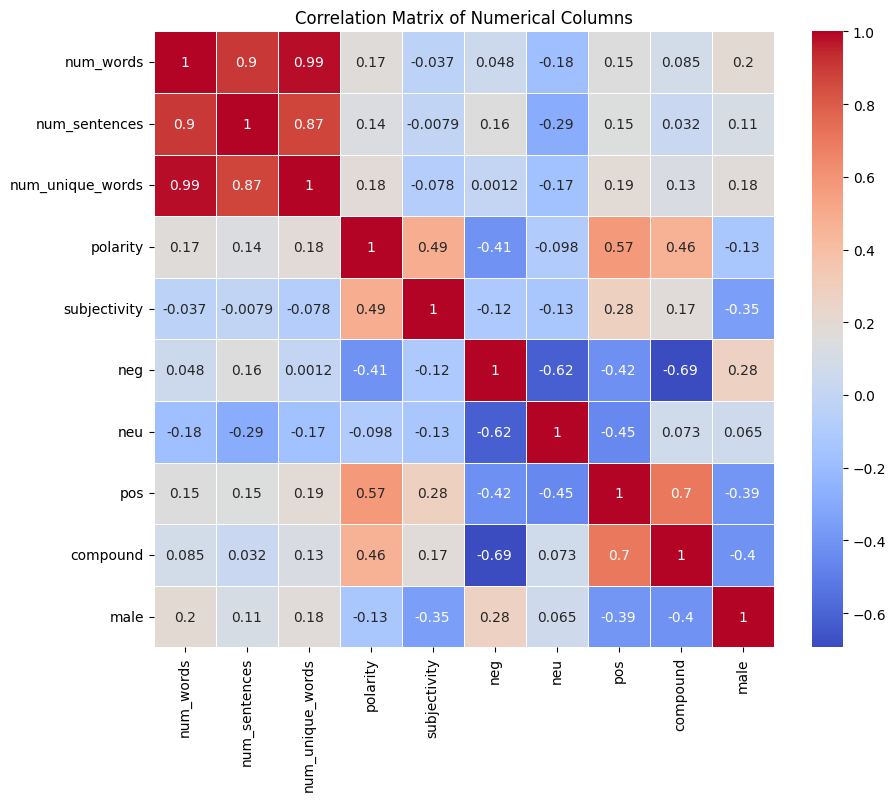

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[['num_words', 'num_sentences', 'num_unique_words',
                  'polarity', 'subjectivity',
                  'neg', 'neu', 'pos', 'compound','male']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [ ]:
df.head(20)

,id,gender,text,male,text_length,num_words,num_sentences,num_unique_words,sentiment,compound,neg,neu,pos,textblob_sentiment,polarity,subjectivity
0,1,W,I'm an Israeli tech entrepreneur and a single ...,0,1944,207,15,143,"{'neg': 0.064, 'neu': 0.694, 'pos': 0.242, 'co...",0.9964,0.064,0.694,0.242,"(0.08649481831300013, 0.5057162534435262)",0.086495,0.505716
1,2,W,Starting my own business was a dream that I ha...,0,2316,237,21,134,"{'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'co...",0.9862,0.101,0.726,0.173,"(0.12415824915824913, 0.5639520202020202)",0.124158,0.563952
2,3,W,I'm an Orthodox Jewish woman who founded a sta...,0,2008,224,19,140,"{'neg': 0.061, 'neu': 0.774, 'pos': 0.165, 'co...",0.9857,0.061,0.774,0.165,"(0.03328282828282828, 0.5338439955106622)",0.033283,0.533844
3,4,W,I was born in a Kibbutz. I founded a startup i...,0,2200,243,25,153,"{'neg': 0.064, 'neu': 0.762, 'pos': 0.174, 'co...",0.9922,0.064,0.762,0.174,"(0.014709595959595942, 0.5041245791245792)",0.014710,0.504125
4,5,W,I'm a 60-year-old woman who's been passionate ...,0,2012,218,17,154,"{'neg': 0.099, 'neu': 0.738, 'pos': 0.163, 'co...",0.9616,0.099,0.738,0.163,"(0.12592885375494067, 0.5407048748353096)",0.125929,0.540705
5,6,W,Michal took great pride in the team she had as...,0,1977,203,16,125,"{'neg': 0.041, 'neu': 0.778, 'pos': 0.181, 'co...",0.9941,0.041,0.778,0.181,"(0.09108044733044734, 0.48631628787878783)",0.091080,0.486316
6,7,W,When I made the decision to leave my previous ...,0,4980,534,40,312,"{'neg': 0.059, 'neu': 0.69, 'pos': 0.251, 'com...",0.9997,0.059,0.690,0.251,"(0.24659359832087105, 0.5710552931916569)",0.246594,0.571055
7,8,W,My name is Maria from Brazil originally and I'...,0,2762,311,31,170,"{'neg': 0.102, 'neu': 0.693, 'pos': 0.204, 'co...",0.9969,0.102,0.693,0.204,"(0.08233907014394819, 0.499834582761412)",0.082339,0.499835
8,9,M,"We did not manage the crisis, the crisis manag...",1,1024,108,12,66,"{'neg': 0.13, 'neu': 0.641, 'pos': 0.229, 'com...",0.9790,0.130,0.641,0.229,"(0.09423076923076924, 0.4403846153846154)",0.094231,0.440385
9,10,M,"I grew up in a small town in Israel, where my ...",1,3194,348,37,206,"{'neg': 0.059, 'neu': 0.732, 'pos': 0.209, 'co...",0.9986,0.059,0.732,0.209,"(0.13012173012173012, 0.46809116809116813)",0.130122,0.468091


In [ ]:
# df.to_csv('new df crisis startups.csv')

# Anlyzing ChatGPT Answers

## The following survery answer was written during crisis, rewrite it during normal time:

In [ ]:
# pip install gspread pandas oauth2client

In [ ]:
import gspread
from google.oauth2.service_account import Credentials
import pandas as pd
import re

In [ ]:
from google.colab import auth #taking df from google sheets
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# Set up the Google Sheets API credentials
#gc = gspread.service_account()

# Set up the OpenAI API credentials
# openai.api_key = "YOUR_API_KEY"

# Load the Google Sheet and select the first worksheet
sheet = gc.open("generated crisis startups responses").sheet1

# import gspread
# gc = gspread.oauth()
# print(dir(gc))

In [ ]:
data = sheet.get_all_values()

# Create a DataFrame from the data
df = pd.DataFrame(data[1:], columns=data[0])

# Print the DataFrame
print(df.shape)
df.head(10)


(98, 5)


,gender,text,male,time,group_b
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0
1,W,Starting my own business was a dream that I ha...,0,1,0
2,W,I'm an Orthodox Jewish woman who founded a sta...,0,1,0
3,W,I was born in a Kibbutz. I founded a startup i...,0,1,0
4,W,I'm a 60-year-old woman who's been passionate ...,0,1,0
5,W,Michal took great pride in the team she had as...,0,1,0
6,W,When I made the decision to leave my previous ...,0,1,0
7,W,My name is Maria from Brazil originally and I'...,0,1,0
8,M,"We did not manage the crisis, the crisis manag...",1,1,0
9,M,"I grew up in a small town in Israel, where my ...",1,1,0


In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize

# Assuming df is your original DataFrame

sentences = []
for index, row in df.iterrows():
    for sentence in sent_tokenize(row['text']):
        sentences.append([row['gender'], sentence, row['male'], row['time'], row['group_b']])

new_df = pd.DataFrame(sentences, columns=['gender', 'text', 'male', 'time', 'group_b'])

In [ ]:
# new_df

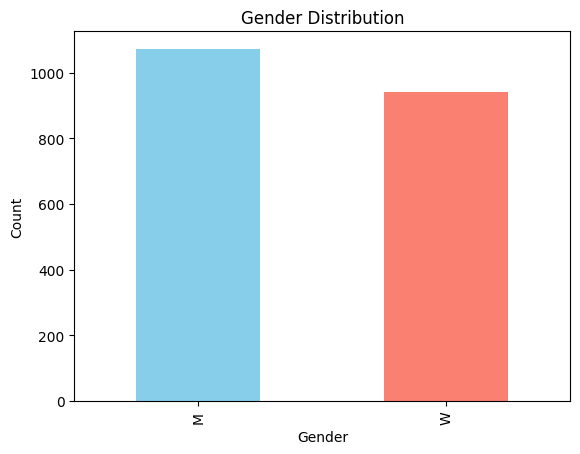

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'gender' column
gender_counts = new_df['gender'].value_counts()

# Create a bar plot
gender_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# pip install textblob

In [ ]:
from textblob import TextBlob

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment

# Analyze the sentiment for each response in the DataFrame
df['textblob_sentiment'] = df['text'].apply(analyze_sentiment)

# Separate the polarity and subjectivity scores into two new columns
df['polarity'] = df['textblob_sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['textblob_sentiment'].apply(lambda x: x.subjectivity)

# Display the updated DataFrame
df.head(3)

,gender,text,male,time,group_b,textblob_sentiment,polarity,subjectivity
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0,"(0.08649481831300013, 0.5057162534435262)",0.086495,0.505716
1,W,Starting my own business was a dream that I ha...,0,1,0,"(0.12415824915824913, 0.5639520202020202)",0.124158,0.563952
2,W,I'm an Orthodox Jewish woman who founded a sta...,0,1,0,"(0.03328282828282828, 0.5338439955106622)",0.033283,0.533844


In [ ]:
# Count positive, neutral, and negative sentences
num_positive = len(df[df['polarity'] > 0])
num_neutral = len(df[df['polarity'] == 0])
num_negative = len(df[df['polarity'] < 0])

print('Number of positive sentences: ', num_positive)
print('Number of neutral sentences: ', num_neutral)
print('Number of negative sentences: ', num_negative)


Number of positive sentences:  92
Number of neutral sentences:  0
Number of negative sentences:  6


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Analyze the sentiment for each response in the DataFrame
df['sentiment'] = df['text'].apply(analyze_sentiment)

# Extract the compound metric from the sentiment scores
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
# Display the updated DataFrame
df.head(10)

,gender,text,male,time,group_b,textblob_sentiment,polarity,subjectivity,sentiment,compound,neg,neu,pos
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0,"(0.08649481831300013, 0.5057162534435262)",0.086495,0.505716,"{'neg': 0.064, 'neu': 0.694, 'pos': 0.242, 'co...",0.9964,0.064,0.694,0.242
1,W,Starting my own business was a dream that I ha...,0,1,0,"(0.12415824915824913, 0.5639520202020202)",0.124158,0.563952,"{'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'co...",0.9862,0.101,0.726,0.173
2,W,I'm an Orthodox Jewish woman who founded a sta...,0,1,0,"(0.03328282828282828, 0.5338439955106622)",0.033283,0.533844,"{'neg': 0.061, 'neu': 0.774, 'pos': 0.165, 'co...",0.9857,0.061,0.774,0.165
3,W,I was born in a Kibbutz. I founded a startup i...,0,1,0,"(0.014709595959595942, 0.5041245791245792)",0.014710,0.504125,"{'neg': 0.064, 'neu': 0.762, 'pos': 0.174, 'co...",0.9922,0.064,0.762,0.174
4,W,I'm a 60-year-old woman who's been passionate ...,0,1,0,"(0.12592885375494067, 0.5407048748353096)",0.125929,0.540705,"{'neg': 0.099, 'neu': 0.738, 'pos': 0.163, 'co...",0.9616,0.099,0.738,0.163
5,W,Michal took great pride in the team she had as...,0,1,0,"(0.09108044733044734, 0.48631628787878783)",0.091080,0.486316,"{'neg': 0.041, 'neu': 0.778, 'pos': 0.181, 'co...",0.9941,0.041,0.778,0.181
6,W,When I made the decision to leave my previous ...,0,1,0,"(0.24659359832087105, 0.5710552931916569)",0.246594,0.571055,"{'neg': 0.059, 'neu': 0.69, 'pos': 0.251, 'com...",0.9997,0.059,0.690,0.251
7,W,My name is Maria from Brazil originally and I'...,0,1,0,"(0.08233907014394819, 0.499834582761412)",0.082339,0.499835,"{'neg': 0.102, 'neu': 0.693, 'pos': 0.204, 'co...",0.9969,0.102,0.693,0.204
8,M,"We did not manage the crisis, the crisis manag...",1,1,0,"(0.09423076923076924, 0.4403846153846154)",0.094231,0.440385,"{'neg': 0.13, 'neu': 0.641, 'pos': 0.229, 'com...",0.9790,0.130,0.641,0.229
9,M,"I grew up in a small town in Israel, where my ...",1,1,0,"(0.13012173012173012, 0.46809116809116813)",0.130122,0.468091,"{'neg': 0.059, 'neu': 0.732, 'pos': 0.209, 'co...",0.9986,0.059,0.732,0.209


In [ ]:
df.columns

Index(['gender', 'text', 'male', 'time', 'group_b', 'textblob_sentiment',
       'polarity', 'subjectivity', 'sentiment', 'compound', 'neg', 'neu',
       'pos'],
      dtype='object')

In [ ]:
print(df['pos'].describe(),'\n')
print(df['neg'].describe())

count    98.000000
mean      0.178102
std       0.048084
min       0.048000
25%       0.151000
50%       0.181500
75%       0.208750
max       0.288000
Name: pos, dtype: float64 

count    98.000000
mean      0.089663
std       0.053256
min       0.007000
25%       0.044500
50%       0.083500
75%       0.114250
max       0.254000
Name: neg, dtype: float64


In [ ]:
# Define the thresholds
positive_threshold = 0.4
negative_threshold = 0.39

# Count positive, neutral, and negative sentences
num_positive = len(df[df['compound'] > positive_threshold])
num_neutral = len(df[(df['compound'] >= negative_threshold) & (df['compound'] <= positive_threshold)])
num_negative = len(df[df['compound'] < negative_threshold])

print('Number of positive sentences: ', num_positive)
print('Number of neutral sentences: ', num_neutral)
print('Number of negative sentences: ', num_negative)


Number of positive sentences:  81
Number of neutral sentences:  0
Number of negative sentences:  17


In [ ]:
# Sort by polarity
sorted_df = df.sort_values(by='pos', ascending=False)

# Get the 5 most positive texts
top_positive_texts = sorted_df[sorted_df['pos'] > 0.4]['text'].head(5)

# Sort by polarity in ascending order to get negative texts
sorted_df_ascend = df.sort_values(by='pos')

# Get the 5 most negative texts
top_negative_texts = sorted_df_ascend[sorted_df_ascend['pos'] < -0.4]['text'].head(5)

print("5 most positive texts:")
print(top_positive_texts)

print("\n5 most negative texts:")
print(top_negative_texts)


5 most positive texts:
Series([], Name: text, dtype: object)

5 most negative texts:
Series([], Name: text, dtype: object)


In [ ]:
df.head(3)



,gender,text,male,time,group_b,textblob_sentiment,polarity,subjectivity,sentiment,compound,neg,neu,pos
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0,"(0.08649481831300013, 0.5057162534435262)",0.086495,0.505716,"{'neg': 0.064, 'neu': 0.694, 'pos': 0.242, 'co...",0.9964,0.064,0.694,0.242
1,W,Starting my own business was a dream that I ha...,0,1,0,"(0.12415824915824913, 0.5639520202020202)",0.124158,0.563952,"{'neg': 0.101, 'neu': 0.726, 'pos': 0.173, 'co...",0.9862,0.101,0.726,0.173
2,W,I'm an Orthodox Jewish woman who founded a sta...,0,1,0,"(0.03328282828282828, 0.5338439955106622)",0.033283,0.533844,"{'neg': 0.061, 'neu': 0.774, 'pos': 0.165, 'co...",0.9857,0.061,0.774,0.165


In [ ]:
import statsmodels.api as sm

# Preprocess the time variable
df['male'] = pd.to_numeric(df['male'])
df['time'] = pd.to_numeric(df['time'])
df['crisis'] = (df['time'] == 1).astype(int)
df['group_b']=pd.to_numeric(df['group_b'])

# Convert the 'sentiment' column to numeric
#df['sentiment'] = pd.to_numeric(df['sentiment'])

# Create a dummy variable for the post-crisis period
# df['test_'] = (df['group_b'] > 0).astype(int)

# Create an interaction term between 'crisis' and 'post_crisis'
df['interaction'] = df['crisis'] * df['group_b']
#df['interaction2'] = df['crisis'] * df['group_b']* df['male']

# Perform the DiD analysis using OLS regression
X = df[['time', 'group_b', 'interaction','male']]
X = sm.add_constant(X)  # Add a constant term
y = df['pos']

model_basic = sm.OLS(y, X)
results_basic = model_basic.fit()

# Print the regression summary
print(results_basic.summary())


                            OLS Regression Results                            
Dep. Variable:                    pos   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     7.181
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           0.000216
Time:                        13:16:23   Log-Likelihood:                 168.97
No. Observations:                  98   AIC:                            -329.9
Df Residuals:                      94   BIC:                            -319.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1521      0.007     21.693      

In [ ]:
# Get the summary table
summary_table = results_basic.summary()

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table.tables[1].data)

# Clean up the header row and index
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.iloc[1:]
summary_df.set_index(summary_df.columns[0], inplace=True)
summary_df.index.name = None

# Save the DataFrame as a CSV file
summary_df.to_csv('regression_results_crisis_basic.csv')


In [ ]:
import statsmodels.api as sm

# Preprocess the time variable
df['male'] = pd.to_numeric(df['male'])
df['time'] = pd.to_numeric(df['time'])
df['crisis'] = (df['time'] == 1).astype(int)
df['group_b']=pd.to_numeric(df['group_b'])

# Convert the 'sentiment' column to numeric
#df['sentiment'] = pd.to_numeric(df['sentiment'])

# Create a dummy variable for the post-crisis period
# df['test_'] = (df['group_b'] > 0).astype(int)

# Create an interaction term between 'crisis' and 'post_crisis'
df['interaction'] = df['crisis'] * df['group_b']
df['interaction2'] = df['crisis'] * df['group_b']* df['male']

# Perform the DiD analysis using OLS regression
X = df[['time', 'group_b', 'interaction','interaction2']]
X = sm.add_constant(X)  # Add a constant term
y = df['pos']


In [ ]:
model_1 = sm.OLS(y, X)
results1 = model_1.fit()

# Print the regression summary
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pos   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     4.117
Date:                Thu, 29 Jun 2023   Prob (F-statistic):            0.00862
Time:                        13:16:23   Log-Likelihood:                 164.91
No. Observations:                  98   AIC:                            -321.8
Df Residuals:                      94   BIC:                            -311.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1351      0.007     20.192   

In [ ]:
# Get the summary table
summary_table = results1.summary()

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table.tables[1].data)

# Clean up the header row and index
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.iloc[1:]
summary_df.set_index(summary_df.columns[0], inplace=True)
summary_df.index.name = None

# Save the DataFrame as a CSV file
summary_df.to_csv('regression_results_crisis_1.csv')


In [ ]:
# Extract key parameters
params = results1.params
std_err = results1.bse
t_values = results1.tvalues
p_values = results1.pvalues

print('Parameters: ', params)
print('Standard errors: ', std_err)
print('T-statistics: ', t_values)
print('P-values: ', p_values)


Parameters:  const           0.135112
time            0.032598
group_b         0.064297
interaction    -0.038218
interaction2   -0.035263
dtype: float64
Standard errors:  const           0.006691
time            0.006691
group_b         0.006691
interaction     0.010013
interaction2    0.014899
dtype: float64
T-statistics:  const           20.192216
time             4.871702
group_b          9.608973
interaction     -3.816663
interaction2    -2.366833
dtype: float64
P-values:  const           5.933746e-36
time            4.469995e-06
group_b         1.246392e-15
interaction     2.421778e-04
interaction2    1.999191e-02
dtype: float64


In [ ]:
individual_A_0= 0.1395
individual_A_1= 0.1395+0.0282

In [ ]:
print('A0',individual_A_0)
print('A1',individual_A_1)

A0 0.1395
A1 0.16770000000000002


In [ ]:
individual_B_0=0.1395+0.0599
individual_B_1= 0.1395+0.0282+0.0599-0.0514

In [ ]:
print('B0',individual_B_0)
print('B1',individual_B_1)

B0 0.19940000000000002
B1 0.17620000000000002


In [ ]:
# Assuming you have a DataFrame called 'df' with columns 'polarity' and 'male'

# Subset of mean for male == 1
subset_mean_male = df[df['male'] == 1]['pos'].mean()

# Subset of mean for male == 0
subset_mean_female = df[df['male'] == 0]['pos'].mean()

print("Subset Mean for Male:", subset_mean_male)
print("Subset Mean for Female:", subset_mean_female)

Subset Mean for Male: 0.1613265306122449
Subset Mean for Female: 0.19487755102040813


In [ ]:
# r1_female_0=c+0
# r1_male_0=c+0-0.0336
# print('calculate_female',r1_female_0)
# print('calculate_male',r1_male_0)
# print('diff',r1_female_0-r1_male_0)

In [ ]:
import statsmodels.api as sm


# Convert the 'sentiment' column to numeric
#df['sentiment'] = pd.to_numeric(df['sentiment'])


# Create a dummy variable for gender (1 for male, 0 for female)
df['male'] = df['male'].astype(int)


# Create an interaction term between 'crisis' and 'post_crisis'
# df['interaction'] = df['crisis'] * df['group_b']

# Perform the DiD analysis using OLS regression
# X = df[['time', 'group_b', 'interaction']]
# Perform the DiD analysis using OLS regression with gender as a control variable
X = df[['time', 'group_b', 'interaction', 'male','interaction2']]
X = sm.add_constant(X)  # Add a constant term
y = df['pos']

model_2 = sm.OLS(y, X)
results2 = model_2.fit()

# Print the regression summary
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                    pos   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.335
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           0.000651
Time:                        13:16:23   Log-Likelihood:                 168.98
No. Observations:                  98   AIC:                            -328.0
Df Residuals:                      93   BIC:                            -315.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1513      0.009     17.554   

In [ ]:
# Get the summary table
summary_table = results2.summary()

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table.tables[1].data)

# Clean up the header row and index
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.iloc[1:]
summary_df.set_index(summary_df.columns[0], inplace=True)
summary_df.index.name = None

# Save the DataFrame as a CSV file
summary_df.to_csv('regression_results_crisis_2.csv')

In [ ]:
# r1_female_1=c+0.0324+0.0641-0.0556
# r1_male_1=c+0.0324+0.0641-0.0556-0.0336
# print('calculate_female',r1_female_1)
# print('calculate_male',r1_male_1)
# print('diff',r1_female_1-r1_male_1)

In [ ]:
c=0.1521

In [ ]:
import statsmodels.api as sm

# Preprocess the time variable
df['time'] = pd.to_numeric(df['time'])
df['crisis'] = (df['time'] == 1).astype(int)

# Convert the 'sentiment' column to numeric
#df['sentiment'] = pd.to_numeric(df['sentiment'])

# Create a dummy variable for the post-crisis period
df['post_crisis'] = (df['time'] > 0).astype(int)

# Create an interaction term between 'crisis' and 'post_crisis'
df['crisis_post_crisis'] = df['crisis'] * df['post_crisis']

# Create a dummy variable for gender (1 for male, 0 for female)
df['male'] = df['male'].astype(int)

# Create an interaction term between 'male' and 'crisis'
df['male_crisis'] = df['male'] * df['post_crisis']

# Perform the DiD analysis using OLS regression with gender and its interaction as control variables
X = df[['crisis', 'post_crisis', 'crisis_post_crisis', 'male_crisis']]
X = sm.add_constant(X)  # Add a constant term
y = df['pos']

model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    pos   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9.976
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           0.000117
Time:                        13:16:23   Log-Likelihood:                 168.20
No. Observations:                  98   AIC:                            -330.4
Df Residuals:                      95   BIC:                            -322.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1994      0

In [ ]:
#@title Default title text
X = df[['time', 'group_b', 'interaction', 'male']]
X = sm.add_constant(X)  # Add a constant term
y = df['subjectivity']

model_3 = sm.OLS(y, X)
results3 = model_3.fit()

# Print the regression summary
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           subjectivity   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     7.589
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           0.000134
Time:                        13:16:23   Log-Likelihood:                 136.38
No. Observations:                  98   AIC:                            -264.8
Df Residuals:                      94   BIC:                            -254.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4180      0.010     42.748      

In [ ]:
# Get the summary table
summary_table = results3.summary()

# Convert the summary table to a DataFrame
summary_df = pd.DataFrame(summary_table.tables[1].data)

# Clean up the header row and index
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.iloc[1:]
summary_df.set_index(summary_df.columns[0], inplace=True)
summary_df.index.name = None

# Save the DataFrame as a CSV file
summary_df.to_csv('regression_results_crisis_3.csv')

In [ ]:
# Assuming you have a DataFrame called 'df' with columns 'polarity' and 'male'

# Subset of mean for male == 1
subset_mean_male = df[df['male'] == 1]['polarity'].mean()

# Subset of mean for male == 0
subset_mean_female = df[df['male'] == 0]['polarity'].mean()

print("Subset Mean for Male:", subset_mean_male)
print("Subset Mean for Female:", subset_mean_female)


Subset Mean for Male: 0.11226387971858842
Subset Mean for Female: 0.14733151670233555


In [ ]:
calculate_female=0.3799+0.1082+0.1377-0.1341+0.14733
calculate_male=0.3799+0.1082+0.1377-0.1341+0.11226
print('calculate_female',calculate_female)
print('calculate_male',calculate_male)
print('diff',calculate_female-calculate_male)

calculate_female 0.63903
calculate_male 0.60396
diff 0.035069999999999935


In [ ]:
# Get the summary table
summary_table = results.summary2()

# Convert the summary table to a DataFrame
summary_df = summary_table.tables[1]

# Save the DataFrame as a CSV file
summary_df.to_csv('regression_results_crisis.csv', index=False)

In [ ]:
import plotly.express as px

before_crisis = df[df['time'] == 0]
after_crisis = df[df['time'] == 1]

before_mean = before_crisis.groupby('male')['pos'].mean()
after_mean = after_crisis.groupby('male')['pos'].mean()

plot_data = pd.DataFrame({'Gender': ['Female', 'Male'],
                          'Before Crisis': before_mean.values,
                          'After Crisis': after_mean.values})
fig = px.bar(plot_data, x='Gender', y=['Before Crisis', 'After Crisis'],
             title='Differences in postivity between Male and Female Before and After Crisis')
fig.update_layout(yaxis_title='Mean pos')
fig.show()

In [ ]:
import plotly.express as px

before_crisis = df[df['time'] == 0]
after_crisis = df[df['time'] == 1]

before_mean = before_crisis.groupby('male')['subjectivity'].mean()
after_mean = after_crisis.groupby('male')['subjectivity'].mean()

plot_data = pd.DataFrame({'Gender': ['Female', 'Male'],
                          'crisis_0': before_mean.values,
                          'crisis_1': after_mean.values})
fig = px.bar(plot_data, x='Gender', y=['crisis_0', 'crisis_1'],
             title='Differences in subjectivity between Male and Female Before and During Crisis')
fig.update_layout(yaxis_title='Mean subjectivity')
fig.show()


In [ ]:
import plotly.express as px

before_crisis = df[df['time'] == 0]
after_crisis = df[df['time'] == 1]

before_mean = before_crisis.groupby('male')['polarity'].mean()
after_mean = after_crisis.groupby('male')['polarity'].mean()

plot_data = pd.DataFrame({'Gender': ['Female', 'Male'],
                          'Before Crisis': before_mean.values,
                          'After Crisis': after_mean.values})
fig = px.bar(plot_data, x='Gender', y=['Before Crisis', 'After Crisis'],
             title='Differences in Polarity between Male and Female Before and After Crisis')
fig.update_layout(yaxis_title='Mean Polarity')
fig.show()


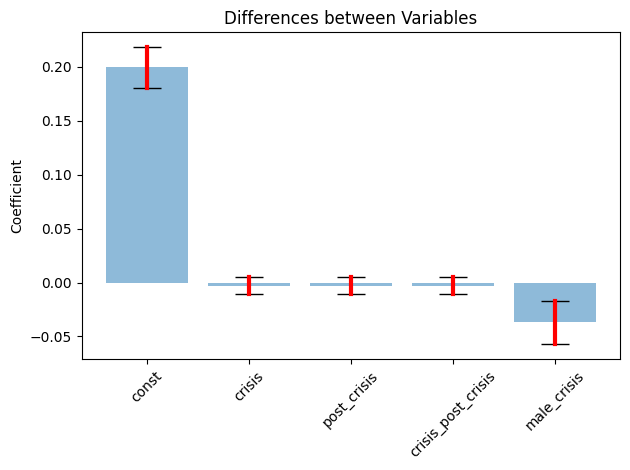

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already run the regression and obtained the 'results' object

# Extract the coefficient estimates from the regression results
coefficients = results.params

# Extract the standard errors for the coefficient estimates
standard_errors = results.bse

# Calculate the lower and upper bounds of the confidence intervals
confidence_intervals = results.conf_int()

# Create an index for the x-axis labels
labels = coefficients.index

# Create an array for the x-axis positions
x_pos = np.arange(len(labels))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the coefficient estimates
ax.bar(x_pos, coefficients, yerr=2 * standard_errors, align='center',
       alpha=0.5, ecolor='black', capsize=10)

# Customize the plot
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Coefficient')
ax.set_title('Differences between Variables')

# Add the confidence intervals to the plot
for i, (lb, ub) in enumerate(confidence_intervals.values):
    ax.plot([i, i], [lb, ub], color='r', linewidth=3)

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Group the data by the 'crisis' variable and compute the average of the outcome variable
grouped = df.groupby('crisis')['polarity'].mean()

# Calculate the DiD estimates
pre_crisis_diff = grouped.loc[0] - grouped.loc[0]  # Difference in outcome before the crisis
post_crisis_diff = grouped.loc[1] - grouped.loc[0]  # Difference in outcome after the crisis

# Create a bar plot
fig = go.Figure(data=[
    go.Bar(name='Before Crisis', x=['Non-Crisis', 'Crisis'], y=[grouped.loc[0], grouped.loc[0]]),
    go.Bar(name='After Crisis', x=['Non-Crisis', 'Crisis'], y=[grouped.loc[0] + pre_crisis_diff, grouped.loc[0] + post_crisis_diff])
])

fig.update_layout(title='Difference-in-Differences (DiD) Analysis',
                  xaxis_title='Group',
                  yaxis_title='Average Outcome Variable')

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have already performed the DiD analysis and obtained the necessary variables

# Group the data by 'time', 'male', and compute the average of the outcome variable
grouped = df.groupby(['time', 'male'])['polarity'].mean()

# Calculate the DiD estimates for each group
pre_crisis_diff = grouped.loc[(0, 1)] - grouped.loc[(0, 0)]  # Difference in outcome before the crisis for males
post_crisis_diff = grouped.loc[(1, 1)] - grouped.loc[(0, 0)]  # Difference in outcome after the crisis for males

# Create a scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=['Control (Female)', 'Control (Male)'],
    y=[grouped.loc[(0, 0)], grouped.loc[(0, 1)]],
    mode='markers',
    name='Time Period 0 (Control)'
))

fig.add_trace(go.Scatter(
    x=['Treatment (Female)', 'Treatment (Male)'],
    y=[grouped.loc[(0, 0)] + pre_crisis_diff, grouped.loc[(0, 1)] + pre_crisis_diff],
    mode='markers',
    name='Time Period 0 (Treatment)'
))

fig.add_trace(go.Scatter(
    x=['Control (Female)', 'Control (Male)'],
    y=[grouped.loc[(1, 0)], grouped.loc[(1, 1)]],
    mode='markers',
    name='Time Period 1 (Control)'
))

fig.add_trace(go.Scatter(
    x=['Treatment (Female)', 'Treatment (Male)'],
    y=[grouped.loc[(1, 0)] + post_crisis_diff, grouped.loc[(1, 1)] + post_crisis_diff],
    mode='markers',
    name='Time Period 1 (Treatment)'
))

fig.update_layout(title='Difference-in-Differences (DiD) Analysis',
                  xaxis_title='Group',
                  yaxis_title='Average Outcome Variable')

fig.show()


In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px

# Calculate sentiment polarity for each text entry
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Filter data for time 0 and time 1
df_time0 = df[df['time'] == 0]
df_time1 = df[df['time'] == 1]

# Create histogram for time 0
fig = px.histogram(df_time0, x="polarity", color="gender", nbins=40,
                   labels={'polarity': 'Sentiment Polarity', 'gender': 'Gender'},
                   title='Sentiment Polarity Distribution by Gender at Time 0')
fig.show()

# Create histogram for time 1
fig = px.histogram(df_time1, x="polarity", color="gender", nbins=40,
                   labels={'polarity': 'Sentiment Polarity', 'gender': 'Gender'},
                   title='Sentiment Polarity Distribution by Gender at Time 1')
fig.show()

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
from textblob import TextBlob

# Calculate sentiment polarity for each text entry
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def create_gender_histogram(df, column, title, time):
    fig = go.Figure()

    # Filter the dataframe based on time
    time_df = df[df['time'] == time]

    # Add histograms for each gender
    for gender, color in zip(['W', 'M'], ['LightPink', 'MidnightBlue']):
        gender_df = time_df[time_df['gender'] == gender]
        fig.add_trace(go.Histogram(x=gender_df[column],
                                    nbinsx=30,
                                    marker_color=color,
                                    opacity=0.5,
                                    name=gender))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      barmode='overlay',
                      legend_title='Gender')

    # Show the plot
    pio.show(fig)

# Create histograms for the polarity scores, separated by gender, at time 0 and time 1
create_gender_histogram(df, 'polarity', 'Polarity Distribution by Gender at Time 0', 0)
create_gender_histogram(df, 'polarity', 'Polarity Distribution by Gender at Time 1', 1)

In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px

# Calculate sentiment polarity for each text entry
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate median polarity by gender and time
median_polarity = df.groupby(['gender', 'time'])['polarity'].median().reset_index()

# Convert 'time' to string so Plotly treats it as a categorical variable
median_polarity['time'] = median_polarity['time'].astype(str)

# Plot using Plotly Express
fig = px.line(median_polarity, x='time', y='polarity', color='gender',
              labels={'polarity': 'Median Polarity', 'time': 'Time', 'gender': 'Gender'},
              title='Median Sentiment Polarity by Gender over Time')
fig.show()

In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.graph_objs as go

# Calculate sentiment polarity for each text entry
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate median polarity by gender and time
#mean_polarity = df.groupby(['gender', 'time'])['polarity'].median().reset_index()
mean_polarity = df.groupby(['gender', 'time'])['polarity'].mean().reset_index()
# Create the figure
fig = go.Figure()

# Create a line for each gender
colors = {'W': 'LightPink', 'M': 'MidnightBlue'}
for gender in mean_polarity['gender'].unique():
    gender_df = mean_polarity[mean_polarity['gender'] == gender]
    fig.add_trace(go.Scatter(x=gender_df['time'], y=gender_df['polarity'],
                             mode='lines+markers', name=gender,
                             line=dict(color=colors[gender])))

# Calculate the gaps and add as text annotations
gaps = mean_polarity.groupby('time')['polarity'].diff().dropna().tolist()
for i, gap in enumerate(gaps, 1):
    fig.add_annotation(x=i, y=max(mean_polarity['polarity']),
                       text=f'Gap: {gap:.2f}', showarrow=False)

# Customize the plot
fig.update_layout(title='mean Sentiment Polarity by Gender over Time',
                  xaxis_title='Time',
                  yaxis_title='mean Polarity',
                  legend_title='Gender')

# Show the plot
fig.show()


# Changing to sentece based

In [ ]:
from textblob import TextBlob

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment

# Analyze the sentiment for each response in the DataFrame
new_df['textblob_sentiment'] = new_df['text'].apply(analyze_sentiment)

# Separate the polarity and subjectivity scores into two new columns
new_df['polarity'] = new_df['textblob_sentiment'].apply(lambda x: x.polarity)
new_df['subjectivity'] = new_df['textblob_sentiment'].apply(lambda x: x.subjectivity)

# Display the updated DataFrame
new_df.head(3)

,gender,text,male,time,group_b,textblob_sentiment,polarity,subjectivity
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0,"(-0.07142857142857142, 0.21428571428571427)",-0.071429,0.214286
1,W,I founded a startup aimed at providing afforda...,0,1,0,"(0.375, 0.375)",0.375000,0.375000
2,W,"It hasn't been an easy journey for me, especia...",0,1,0,"(0.21666666666666667, 0.9166666666666667)",0.216667,0.916667


In [ ]:
# Count positive, neutral, and negative sentences
num_positive = len(new_df[new_df['polarity'] > 0])
num_neutral = len(new_df[new_df['polarity'] == 0])
num_negative = len(new_df[new_df['polarity'] < 0])

print('Number of positive sentences: ', num_positive)
print('Number of neutral sentences: ', num_neutral)
print('Number of negative sentences: ', num_negative)


Number of positive sentences:  998
Number of neutral sentences:  666
Number of negative sentences:  349


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of a text
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

# Analyze the sentiment for each response in the DataFrame
new_df['sentiment'] = new_df['text'].apply(analyze_sentiment)

# Extract the compound metric from the sentiment scores
new_df['compound'] = new_df['sentiment'].apply(lambda x: x['compound'])
new_df['neg'] = new_df['sentiment'].apply(lambda x: x['neg'])
new_df['neu'] = new_df['sentiment'].apply(lambda x: x['neu'])
new_df['pos'] = new_df['sentiment'].apply(lambda x: x['pos'])
# Display the updated DataFrame
new_df.head(10)

,gender,text,male,time,group_b,textblob_sentiment,polarity,subjectivity,sentiment,compound,neg,neu,pos
0,W,I'm an Israeli tech entrepreneur and a single ...,0,1,0,"(-0.07142857142857142, 0.21428571428571427)",-0.071429,0.214286,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
1,W,I founded a startup aimed at providing afforda...,0,1,0,"(0.375, 0.375)",0.375000,0.375000,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.1779,0.000,0.876,0.124
2,W,"It hasn't been an easy journey for me, especia...",0,1,0,"(0.21666666666666667, 0.9166666666666667)",0.216667,0.916667,"{'neg': 0.048, 'neu': 0.84, 'pos': 0.112, 'com...",0.5101,0.048,0.840,0.112
3,W,"I poured my heart and soul into my startup, wo...",0,1,0,"(0.5, 1.0)",0.500000,1.000000,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5574,0.000,0.777,0.223
4,W,"I knew it was a lofty goal, but I refused to l...",0,1,0,"(0.0, 0.0)",0.000000,0.000000,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.4215,0.157,0.843,0.000
5,W,"Despite the limited resources, I remained dete...",0,1,0,"(-0.07142857142857142, 0.14285714285714285)",-0.071429,0.142857,"{'neg': 0.142, 'neu': 0.626, 'pos': 0.231, 'co...",0.1446,0.142,0.626,0.231
6,W,"There were many challenges along the way, from...",0,1,0,"(0.13214285714285715, 0.4357142857142857)",0.132143,0.435714,"{'neg': 0.091, 'neu': 0.721, 'pos': 0.188, 'co...",0.2500,0.091,0.721,0.188
7,W,But I remained focused on the bigger picture a...,0,1,0,"(0.0, 0.5)",0.000000,0.500000,"{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'comp...",0.9266,0.000,0.557,0.443
8,W,One of the biggest setbacks I faced was when a...,0,1,0,"(0.06818181818181818, 0.7272727272727273)",0.068182,0.727273,"{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...",-0.4215,0.109,0.891,0.000
9,W,"It was a tough time, but I remained optimistic...",0,1,0,"(-0.09438131313131314, 0.41571969696969696)",-0.094381,0.415720,"{'neg': 0.046, 'neu': 0.548, 'pos': 0.406, 'co...",0.8968,0.046,0.548,0.406


In [ ]:
new_df_man.describe()

,polarity,subjectivity,compound,neg,neu,pos
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,0.095086,0.397899,0.120838,0.098292,0.754225,0.147488
std,0.244501,0.315194,0.482818,0.127414,0.151213,0.135862
min,-0.910000,0.000000,-0.944200,0.000000,0.274000,0.000000
25%,0.000000,0.066667,-0.296000,0.000000,0.653000,0.000000
50%,0.000000,0.402860,0.145500,0.000000,0.754500,0.130500
75%,0.233333,0.602746,0.528675,0.173500,0.864000,0.240000
max,1.000000,1.000000,0.979300,0.625000,1.000000,0.648000


In [ ]:
# Define the thresholds
positive_threshold = 0.4
negative_threshold = 0.3

# Count positive, neutral, and negative sentences
num_positive = len(new_df[new_df['compound'] > positive_threshold])
num_neutral = len(new_df[(new_df['compound'] >= negative_threshold) & (new_df['compound'] <= positive_threshold)])
num_negative = len(new_df[new_df['compound'] < negative_threshold])

print('Number of positive sentences: ', num_positive)
print('Number of neutral sentences: ', num_neutral)
print('Number of negative sentences: ', num_negative)


Number of positive sentences:  797
Number of neutral sentences:  128
Number of negative sentences:  1088


In [ ]:
# Define the thresholds
positive_threshold = 0.162

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_woman = new_df[new_df['gender'] == 'W']

# Count positive sentiments during crisis
positive_crisis = len(new_df_woman[(new_df_woman['pos'] > positive_threshold) & (new_df_woman['time'] == 1)])

# Count positive sentiments not during crisis
positive_non_crisis = len(new_df_woman[(new_df_woman['pos'] > positive_threshold) & (new_df_woman['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_woman[new_df_woman['time'] == True])
total_non_crisis = len(new_df_woman[new_df_woman['time'] == False])

# Calculate percentages
percentage_positive_crisis = (positive_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_positive_non_crisis = (positive_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number of positive sentiments by women during crisis: ', positive_crisis)
print('Percentage of positive sentiments by women during crisis: ', percentage_positive_crisis)

print('Number of positive sentiments by women not during crisis: ', positive_non_crisis)
print('Percentage of positive sentiments by women not during crisis: ', percentage_positive_non_crisis)


Number of positive sentiments by women during crisis:  0
Percentage of positive sentiments by women during crisis:  0
Number of positive sentiments by women not during crisis:  0
Percentage of positive sentiments by women not during crisis:  0


In [ ]:
# Define the threshold
threshold = 0.131

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_man = new_df[new_df['gender'] == 'M']

# Count positive sentiments during crisis
positive_crisis = len(new_df_man[(new_df_man['pos'] > positive_threshold) & (new_df_man['time'] == 1)])

# Count positive sentiments not during crisis
positive_non_crisis = len(new_df_man[(new_df_man['pos'] > positive_threshold) & (new_df_man['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_man[new_df_man['time'] == True])
total_non_crisis = len(new_df_man[new_df_man['time'] == False])

# Calculate percentages
percentage_positive_crisis = (positive_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_positive_non_crisis = (positive_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number of positive sentiments by men during crisis: ', positive_crisis)
print('Percentage of positive sentiments by women during crisis: ', percentage_positive_crisis)

print('Number of positive sentiments by men not during crisis: ', positive_non_crisis)
print('Percentage of positive sentiments by women not during crisis: ', percentage_positive_non_crisis)


Number of positive sentiments by men during crisis:  0
Percentage of positive sentiments by women during crisis:  0
Number of positive sentiments by men not during crisis:  0
Percentage of positive sentiments by women not during crisis:  0


In [ ]:
new_df_woman.describe()

,polarity,subjectivity,compound,neg,neu,pos
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,0.115831,0.429038,0.240789,0.072618,0.755353,0.170977
std,0.242577,0.325306,0.454762,0.117720,0.160330,0.144547
min,-1.000000,0.000000,-0.910000,0.000000,0.000000,0.000000
25%,0.000000,0.071429,0.000000,0.000000,0.652000,0.000000
50%,0.027273,0.466667,0.273200,0.000000,0.751000,0.162000
75%,0.255682,0.668333,0.624900,0.119000,0.872000,0.276000
max,1.000000,1.000000,0.962800,0.811000,1.000000,0.639000


In [ ]:
# Define the threshold
negative_threshold = 0

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_woman = new_df[new_df['gender'] == 'W']

# Count negative sentiments during crisis
negative_crisis = len(new_df_woman[(new_df_woman['neg'] > negative_threshold) & (new_df_woman['time'] == 1)])

# Count negative sentiments not during crisis
negative_non_crisis = len(new_df_woman[(new_df_woman['neg'] > negative_threshold) & (new_df_woman['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_woman[new_df_woman['time'] == 1])
total_non_crisis = len(new_df_woman[new_df_woman['time'] == 0])

# Calculate percentages
percentage_negative_crisis = (negative_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_negative_non_crisis = (negative_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number of negative sentiments by women during crisis: ', negative_crisis)
print('Percentage of negative sentiments by women during crisis: ', percentage_negative_crisis)

print('Number of negative sentiments by women not during crisis: ', negative_non_crisis)
print('Percentage of negative sentiments by women not during crisis: ', percentage_negative_non_crisis)


Number of negative sentiments by women during crisis:  0
Percentage of negative sentiments by women during crisis:  0
Number of negative sentiments by women not during crisis:  0
Percentage of negative sentiments by women not during crisis:  0


In [ ]:
# Define the threshold
negative_threshold = 0

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_man = new_df[new_df['gender'] == 'M']

# Count negative sentiments during crisis
negative_crisis = len(new_df_man[(new_df_man['neg'] > negative_threshold) & (new_df_man['time'] == 1)])

# Count negative sentiments not during crisis
negative_non_crisis = len(new_df_man[(new_df_man['neg'] > negative_threshold) & (new_df_man['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_man[new_df_man['time'] == 1])
total_non_crisis = len(new_df_man[new_df_man['time'] == 0])

# Calculate percentages
percentage_negative_crisis = (negative_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_negative_non_crisis = (negative_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number of negative sentiments by women during crisis: ', negative_crisis)
print('Percentage of negative sentiments by women during crisis: ', percentage_negative_crisis)

print('Number of negative sentiments by women not during crisis: ', negative_non_crisis)
print('Percentage of negative sentiments by women not during crisis: ', percentage_negative_non_crisis)


Number of negative sentiments by women during crisis:  0
Percentage of negative sentiments by women during crisis:  0
Number of negative sentiments by women not during crisis:  0
Percentage of negative sentiments by women not during crisis:  0


In [ ]:
# Define the threshold
threshold = 0.467

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_woman = new_df[new_df['gender'] == 'W']

# Count objective and subjective sentiments during crisis
objective_crisis = len(new_df_woman[(new_df_woman['subjectivity'] <= threshold) &
                                    (new_df_woman['time'] == 1)])
subjective_crisis = len(new_df_woman[(new_df_woman['subjectivity'] > threshold) &
                                     (new_df_woman['time'] == 1)])

# Count objective and subjective sentiments not during crisis
objective_non_crisis = len(new_df_woman[(new_df_woman['subjectivity'] <= threshold) &
                                        (new_df_woman['time'] == 0)])
subjective_non_crisis = len(new_df_woman[(new_df_woman['subjectivity'] > threshold) &
                                         (new_df_woman['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_woman[new_df_woman['time'] == 1])
total_non_crisis = len(new_df_woman[new_df_woman['time'] == 0])

# Calculate percentages
percentage_objective_crisis = (objective_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_subjective_crisis = (subjective_crisis / total_crisis) * 100 if total_crisis > 0 else 0

percentage_objective_non_crisis = (objective_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0
percentage_subjective_non_crisis = (subjective_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number and percentage of objective sentiments by women during crisis: ', objective_crisis, ', ', percentage_objective_crisis)
print('Number and percentage of subjective sentiments by women during crisis: ', subjective_crisis, ', ', percentage_subjective_crisis)

print('Number and percentage of objective sentiments by women not during crisis: ', objective_non_crisis, ', ', percentage_objective_non_crisis)
print('Number and percentage of subjective sentiments by women not during crisis: ', subjective_non_crisis, ', ', percentage_subjective_non_crisis)


Number and percentage of objective sentiments by women during crisis:  0 ,  0
Number and percentage of subjective sentiments by women during crisis:  0 ,  0
Number and percentage of objective sentiments by women not during crisis:  0 ,  0
Number and percentage of subjective sentiments by women not during crisis:  0 ,  0


In [ ]:
# Define the threshold
threshold = 0.402

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_man = new_df[new_df['gender'] == 'M']

# Count objective and subjective sentiments during crisis
objective_crisis = len(new_df_man[(new_df_man['subjectivity'] <= threshold) &
                                    (new_df_man['time'] == 1)])
subjective_crisis = len(new_df_man[(new_df_man['subjectivity'] > threshold) &
                                     (new_df_man['time'] == 1)])

# Count objective and subjective sentiments not during crisis
objective_non_crisis = len(new_df_man[(new_df_man['subjectivity'] <= threshold) &
                                        (new_df_man['time'] == 0)])
subjective_non_crisis = len(new_df_man[(new_df_man['subjectivity'] > threshold) &
                                         (new_df_man['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_man[new_df_man['time'] == 1])
total_non_crisis = len(new_df_man[new_df_man['time'] == 0])

# Calculate percentages
percentage_objective_crisis = (objective_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_subjective_crisis = (subjective_crisis / total_crisis) * 100 if total_crisis > 0 else 0

percentage_objective_non_crisis = (objective_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0
percentage_subjective_non_crisis = (subjective_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number and percentage of objective sentiments by women during crisis: ', objective_crisis, ', ', percentage_objective_crisis)
print('Number and percentage of subjective sentiments by women during crisis: ', subjective_crisis, ', ', percentage_subjective_crisis)

print('Number and percentage of objective sentiments by women not during crisis: ', objective_non_crisis, ', ', percentage_objective_non_crisis)
print('Number and percentage of subjective sentiments by women not during crisis: ', subjective_non_crisis, ', ', percentage_subjective_non_crisis)


Number and percentage of objective sentiments by women during crisis:  0 ,  0
Number and percentage of subjective sentiments by women during crisis:  0 ,  0
Number and percentage of objective sentiments by women not during crisis:  0 ,  0
Number and percentage of subjective sentiments by women not during crisis:  0 ,  0


In [ ]:
new_df_man.describe()

,polarity,subjectivity,compound,neg,neu,pos
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,0.095086,0.397899,0.120838,0.098292,0.754225,0.147488
std,0.244501,0.315194,0.482818,0.127414,0.151213,0.135862
min,-0.910000,0.000000,-0.944200,0.000000,0.274000,0.000000
25%,0.000000,0.066667,-0.296000,0.000000,0.653000,0.000000
50%,0.000000,0.402860,0.145500,0.000000,0.754500,0.130500
75%,0.233333,0.602746,0.528675,0.173500,0.864000,0.240000
max,1.000000,1.000000,0.979300,0.625000,1.000000,0.648000


In [ ]:
# Define the thresholds
negative_threshold = -0.05
positive_threshold = 0.2

# Filter the DataFrame to only include rows where the gender is 'woman'
new_df_woman = new_df[new_df['gender'] == 'W']

# Count neutral sentiments during crisis
neutral_crisis = len(new_df_woman[(new_df_woman['compound'] >= negative_threshold) &
                                  (new_df_woman['compound'] <= positive_threshold) &
                                  (new_df_woman['time'] == 1)])

# Count neutral sentiments not during crisis
neutral_non_crisis = len(new_df_woman[(new_df_woman['compound'] >= negative_threshold) &
                                      (new_df_woman['compound'] <= positive_threshold) &
                                      (new_df_woman['time'] == 0)])

# Total count during crisis and not during crisis
total_crisis = len(new_df_woman[new_df_woman['time'] == 1])
total_non_crisis = len(new_df_woman[new_df_woman['time'] == 0])

# Calculate percentages
percentage_neutral_crisis = (neutral_crisis / total_crisis) * 100 if total_crisis > 0 else 0
percentage_neutral_non_crisis = (neutral_non_crisis / total_non_crisis) * 100 if total_non_crisis > 0 else 0

print('Number of neutral sentiments by women during crisis: ', neutral_crisis)
print('Percentage of neutral sentiments by women during crisis: ', percentage_neutral_crisis)

print('Number of neutral sentiments by women not during crisis: ', neutral_non_crisis)
print('Percentage of neutral sentiments by women not during crisis: ', percentage_neutral_non_crisis)


Number of neutral sentiments by women during crisis:  0
Percentage of neutral sentiments by women during crisis:  0
Number of neutral sentiments by women not during crisis:  0
Percentage of neutral sentiments by women not during crisis:  0


In [ ]:
new_df.shape

(2013, 15)

In [ ]:
new_df_woman.shape

(941, 13)

In [ ]:
# Create a new DataFrame with rows where 'time' equals 1
df_time_0 = new_df[new_df['time'] == 0]
df_time_1 = new_df[new_df['time'] == 1]

#df_time_1.head()
print(len(new_df_woman))
print(len(df_time_1))

941
0


In [ ]:
# Sort by polarity
sorted_df = new_df.sort_values(by='pos', ascending=False)

# Get the 5 most positive texts
top_positive_texts = sorted_df[sorted_df['pos'] >= 0.4]['text'].head(5)

# Sort by polarity in ascending order to get negative texts
sorted_df_ascend = new_df.sort_values(by='pos')

# Get the 5 most negative texts
top_negative_texts = sorted_df_ascend[sorted_df_ascend['pos'] < 0.2]['text'].head(10)

print("5 most positive texts:")
print(top_positive_texts)

print("\n5 most negative texts:")
print(top_negative_texts)

5 most positive texts:
1249    A good listener can express compassion, gratit...
443                  We should adopt a positive thinking.
544       I am a better leader and a better communicator.
886     Nonetheless, we never lost sight of hope or op...
1237    A successful team requires effective communica...
Name: text, dtype: object

5 most negative texts:
0      I'm an Israeli tech entrepreneur and a single ...
900    However, she realized it was the appropriate c...
902    The team had been clocking in long hours, push...
908    Deciding to part ways with my former organizat...
914    On joining the new firm, I aspired to shed old...
919    The Covid-19 pandemic introduced a further lay...
921    A few years ago, I embarked on my entrepreneur...
926    There are, of course, downsides to running a b...
934    Initially, it was surreal; we were a small hea...
936    We promptly arranged a meeting to discuss the ...
Name: text, dtype: object


In [ ]:
# Filter the dataframe for each gender
df_women = new_df[new_df['gender'] == 'W']
df_men = new_df[new_df['gender'] == 'M']

# Get the 5 most positive texts for women
sorted_df_women = df_women.sort_values(by='pos', ascending=False)
top_positive_texts_women = sorted_df_women[sorted_df_women['pos'] >= 0.4]['text'].head(5)

# Get the 5 most positive texts for men
sorted_df_men = df_men.sort_values(by='pos', ascending=False)
top_positive_texts_men = sorted_df_men[sorted_df_men['pos'] >= 0.4]['text'].head(5)

# Sort by polarity in ascending order to get negative texts
# Get the 5 most negative texts for women
sorted_df_women_ascend = df_women.sort_values(by='pos')
top_negative_texts_women = sorted_df_women_ascend[sorted_df_women_ascend['pos'] < 0.2]['text'].head(5)

# Get the 5 most negative texts for men
sorted_df_men_ascend = df_men.sort_values(by='pos')
top_negative_texts_men = sorted_df_men_ascend[sorted_df_men_ascend['pos'] < 0.2]['text'].head(5)
pd.set_option('display.max_colwidth', None)
print("5 most positive texts for women:")
print(top_positive_texts_women)
print("\n5 most positive texts for men:")
print(top_positive_texts_men)

print("\n5 most negative texts for women:")
print(top_negative_texts_women)
print("\n5 most negative texts for men:")
print(top_negative_texts_men)


5 most positive texts for women:
443                                                                                   We should adopt a positive thinking.
544                                                                        I am a better leader and a better communicator.
886                                                                  Nonetheless, we never lost sight of hope or optimism.
932        I eagerly anticipate our future journey and the innovative solutions we'll create alongside my remarkable team.
1686    This comprehensive approach enables us to identify growth and improvement areas and foster a strong, unified team.
Name: text, dtype: object

5 most positive texts for men:
1249       A good listener can express compassion, gratitude, and leadership.
1237    A successful team requires effective communication and collaboration.
364                                                      I am always healthy.
1820                     Effective communication and collabo

In [ ]:
print(top_positive_texts[1249],'\n',
top_positive_texts[443],'\n',
top_positive_texts[544],'\n',
top_positive_texts[886],'\n',
top_positive_texts[1237])

A good listener can express compassion, gratitude, and leadership. 
 We should adopt a positive thinking. 
 I am a better leader and a better communicator. 
 Nonetheless, we never lost sight of hope or optimism. 
 A successful team requires effective communication and collaboration.


In [ ]:
print(top_negative_texts[934],'\n',
top_negative_texts[926],'\n',
top_negative_texts[902],'\n',
top_negative_texts[908],'\n',
top_negative_texts[914])

Initially, it was surreal; we were a small healthcare technology startup, and suddenly, a gigantic corporation was offering a buyout. 
 There are, of course, downsides to running a business. 
 The team had been clocking in long hours, pushing their limits, which began to affect their mental and physical wellbeing. 
 Deciding to part ways with my former organization amidst a crisis was a taxing and formidable decision. 
 On joining the new firm, I aspired to shed old habits and reinvent myself, but soon discovered that my flaws and biases had made the journey with me.


In [ ]:
# Sort by polarity
sorted_df = new_df.sort_values(by='subjectivity', ascending=False)

# Get the 5 most positive texts
top_subj_texts = sorted_df[sorted_df['subjectivity'] >= 0.4]['text'].head(5)

# Sort by polarity in ascending order to get negative texts
sorted_df_ascend = new_df.sort_values(by='subjectivity')

# Get the 5 most negative texts
top_obj_texts = sorted_df_ascend[sorted_df_ascend['subjectivity'] < 0.2]['text'].head(10)

print("5 most subjective texts:")
print(top_subj_texts)

print("\n5 most objective texts:")
print(top_obj_texts)

5 most subjective texts:
1023    I was not only concerned about the challenges facing our startup, but also found myself troubled by my own worrying - a sentiment uncharacteristic of me.
198                                                                                          They taught me that anything is possible if you put your mind to it.
941                                                                                Ultimately, we decided to decline the offer and continue forging our own path.
1163               Akin to a delectable dish, a prosperous business calls for meticulous planning, keen attention to detail, and the perfect blend of components.
1894                                                                                            Managing my fears has been key to handling business difficulties.
Name: text, dtype: object

5 most objective texts:
1177                                                                                                          Our 

In [ ]:
print(top_subj_texts[1023],'\n',
top_subj_texts[198],'\n',
top_subj_texts[941],'\n',
top_subj_texts[1163],'\n',
top_subj_texts[1894])

I was not only concerned about the challenges facing our startup, but also found myself troubled by my own worrying - a sentiment uncharacteristic of me. 
 They taught me that anything is possible if you put your mind to it. 
 Ultimately, we decided to decline the offer and continue forging our own path. 
 Akin to a delectable dish, a prosperous business calls for meticulous planning, keen attention to detail, and the perfect blend of components. 
 Managing my fears has been key to handling business difficulties.


In [ ]:
print(top_obj_texts[1177],'\n',
top_obj_texts[1395],'\n',
top_obj_texts[863],'\n',
top_obj_texts[405],'\n',
top_obj_texts[866])

Our mentor instilled this hope in us. 
 Recognizing the value I could bring to the table, I persisted in the face of obstacles and rejections. 
 Regrettably, my efforts didn't bear fruit. 
 After that, you lose that window. 
 However, I refused to capitulate.


In [ ]:
import statsmodels.api as sm

# Preprocess the time variable
new_df['time'] = pd.to_numeric(new_df['time'])
new_df['male'] = pd.to_numeric(new_df['male'])
new_df['crisis'] = (new_df['time'] == 1).astype(int)
new_df['group_b']=pd.to_numeric(new_df['group_b'])

# Convert the 'sentiment' column to numeric
#new_df['sentiment'] = pd.to_numeric(new_df['sentiment'])

# Create a dummy variable for the post-crisis period
# new_df['test_'] = (new_df['group_b'] > 0).astype(int)

# Create an interaction term between 'crisis' and 'post_crisis'
new_df['interaction'] = new_df['crisis'] * new_df['group_b']

# Perform the DiD analysis using OLS regression
X = new_df[['time', 'group_b', 'interaction']]
X = sm.add_constant(X)  # Add a constant term
y = new_df['pos']

model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    pos   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.862
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.25e-05
Time:                        13:20:03   Log-Likelihood:                 1107.3
No. Observations:                2013   AIC:                            -2207.
Df Residuals:                    2009   BIC:                            -2184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.376e+11   2.26e+11      1.052      

In [ ]:
import pandas as pd
from textblob import TextBlob
import plotly.express as px

# Assume new_df is your DataFrame and 'text' is the column with the text data

# Calculate sentiment polarity for each text entry
new_df['polarity'] = new_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Average polarity by gender
average_polarity = new_df.groupby('gender')['polarity'].mean().reset_index()

# Plot using Plotly Express
fig = px.bar(average_polarity, x='gender', y='polarity', color='gender',
             labels={'polarity': 'Average Polarity', 'gender': 'Gender'},
             title='Average Sentiment Polarity by Gender')
fig.show()


In [ ]:
X = new_df[['time', 'group_b', 'interaction', 'male']]
X = sm.add_constant(X)  # Add a constant term
y = new_df['polarity']

model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.715
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0285
Time:                        13:20:13   Log-Likelihood:                -8.9273
No. Observations:                2013   AIC:                             27.85
Df Residuals:                    2008   BIC:                             55.89
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.061e+11   5.79e+11      1.046      

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

def create_gender_histogram(new_df, column, title):
    fig = go.Figure()

    # Add histograms for each gender
    for gender, color in zip(['W', 'M'], ['LightPink', 'MidnightBlue']):
        gender_new_df = new_df[new_df['gender'] == gender]
        fig.add_trace(go.Histogram(x=gender_new_df[column],
                                    nbinsx=30,
                                    marker_color=color,
                                    opacity=0.5,
                                    name=gender))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      barmode='overlay',
                      legend_title='Gender')

    # Show the plot
    pio.show(fig)

# Create histograms for the polarity and subjectivity scores, separated by gender
create_gender_histogram(new_df, 'pos', 'pos Distribution by Gender')
create_gender_histogram(new_df, 'neg', 'neg Distribution by Gender')

In [ ]:
def create_gender_histogram(new_df, column, title):
    fig = go.Figure()

    # Define time periods and their colors
    time_periods = {0: 'Non-Crisis', 1: 'Crisis'}
    colors = {'W': 'LightPink', 'M': 'MidnightBlue'}

    # Add histograms for each gender and time period
    for gender in ['W', 'M']:
        for time, time_label in time_periods.items():
            gender_time_new_df = new_df[(new_df['gender'] == gender) & (new_df['time'] == time)]
            fig.add_trace(go.Histogram(x=gender_time_new_df[column],
                                       nbinsx=30,
                                       marker_color=colors[gender],
                                       opacity=0.5,
                                       name=f'{gender} - {time_label}'))

    # Customize the plot
    fig.update_layout(title=title,
                      xaxis_title=column,
                      yaxis_title='Frequency',
                      barmode='overlay',
                      legend_title='Gender and Time')

    # Show the plot
    pio.show(fig)

# Create histograms for the polarity and subjectivity scores, separated by gender and time
create_gender_histogram(new_df, 'polarity', 'Polarity Distribution by Gender and Time')
create_gender_histogram(new_df, 'subjectivity', 'Subjectivity Distribution by Gender and Time')


In [ ]:
# For men
positive_sentences_men_time_0 = new_df[(new_df['gender']=='M') & (new_df['time']==0)].sort_values(by='pos', ascending=False)['text'].values[0]
positive_sentences_men_time_1 = new_df[(new_df['gender']=='M') & (new_df['time']==1)].sort_values(by='pos', ascending=False)['text'].values[0]

# For women
positive_sentences_women_time_0 = new_df[(new_df['gender']=='W') & (new_df['time']==0)].sort_values(by='pos', ascending=False)['text'].values[0]
positive_sentences_women_time_1 = new_df[(new_df['gender']=='W') & (new_df['time']==1)].sort_values(by='pos', ascending=False)['text'].values[0]


In [ ]:
# Calculate median positivity and negativity
median_pos_men = new_df[new_df['gender']=='M']['pos'].median()
median_pos_women = new_df[new_df['gender']=='W']['pos'].median()

median_neg_men = new_df[new_df['gender']=='M']['neg'].median()
median_neg_women = new_df[new_df['gender']=='W']['neg'].median()


In [ ]:
# For men
positive_sentences_men_time_0 = new_df[(new_df['gender']=='M') & (new_df['time']==0)].sort_values(by='pos', ascending=False)['text'].head(10)
positive_sentences_men_time_1 = new_df[(new_df['gender']=='M') & (new_df['time']==1)].sort_values(by='pos', ascending=False)['text'].head(10)

# For women
positive_sentences_women_time_0 = new_df[(new_df['gender']=='W') & (new_df['time']==0)].sort_values(by='pos', ascending=False)['text'].head(10)
positive_sentences_women_time_1 = new_df[(new_df['gender']=='W') & (new_df['time']==1)].sort_values(by='pos', ascending=False)['text'].head(10)


In [ ]:
print("Most positive sentences from men during non-crisis time:")
print(positive_sentences_men_time_0)
print("\nMost positive sentences from men during crisis time:")
print(positive_sentences_men_time_1)

print("\nMost positive sentences from women during non-crisis time:")
print(positive_sentences_women_time_0)
print("\nMost positive sentences from women during crisis time:")
print(positive_sentences_women_time_1)


Most positive sentences from men during non-crisis time:
1820                                                                                     Effective communication and collaboration are vital.
1870                                                                        Running a startup with friends can feel like a journey of growth.
1824    The qualities nurtured by fatherhood - compassion, care, responsibility - have played a significant role in my approach to investing.
1939                                                                                However, it presents unique opportunities and advantages.
1924                                                                                       Support systems play a crucial role during crises.
1928                                                              There was considerable emotional support, but financial support was scarce.
1900                                                                                       